<a href="https://colab.research.google.com/github/Jose1995-S/CANVIA/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Algebra lineal
import pandas as pd # Procesamiento de datos, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns # Visualización de datos estadísticos
import plotly.graph_objects as go # Trazar objetos gráficos
import warnings # Manejar mensajes de advertencia
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia

In [ ]:
#Cargamos la data
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Comprobar el nombre de las columnas
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#Comprobando la forma de los datos
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Comprobando los valores nulos en el conjunto de datos
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

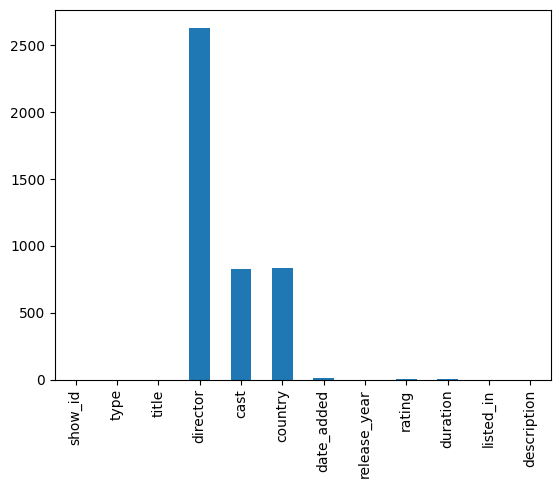

In [ ]:
df.isnull().sum().plot(kind='bar')

In [ ]:
# Eliminar los valores faltantes del DataFrame
netflix=df.dropna()

# Después de eliminar los valores faltantes, verifique la forma de los datos.
print(f'LA base de datos contiene {netflix.shape[0]} filas y {netflix.shape[1]} columnas')

LA base de datos contiene 5332 filas y 12 columnas


In [ ]:
# Comprobando los valores duplicados en los datos.
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


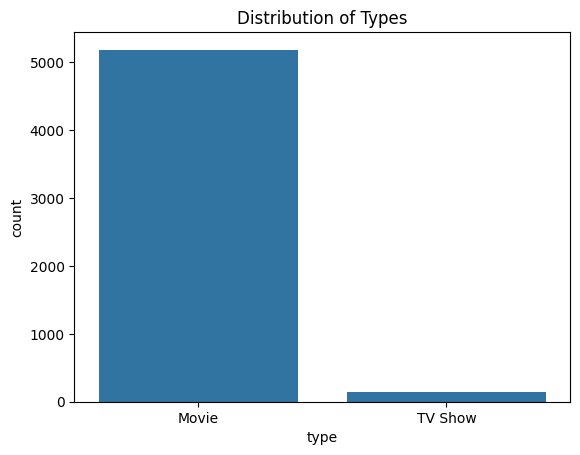

In [ ]:
# Cree un gráfico de recuento para la columna 'tipo'
sns.countplot(data=netflix, x='type')

# Establecer el título de la trama.
plt.title('Distribution of Types')

# Display the plot
plt.show()

In [ ]:
# Cuente las apariciones de cada entrada única en la columna 'listed_in'
genre_counts = movie['listed_in'].value_counts()

# Mostrar el recuento de géneros
print("Recuento de genero:")
print(genre_counts)

Recuento de genero:
Dramas, International Movies                                        336
Stand-Up Comedy                                                     286
Comedies, Dramas, International Movies                              257
Dramas, Independent Movies, International Movies                    243
Children & Family Movies, Comedies                                  179
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
LGBTQ Movies, Thrillers                                               1
Sci-Fi & Fantasy                                                      1
Children & Family Movies, Comedies, Cult Movies                       1
Cult Movies, Dramas, Thrillers                                        1
Name: listed_in, Length: 268, dtype: int64


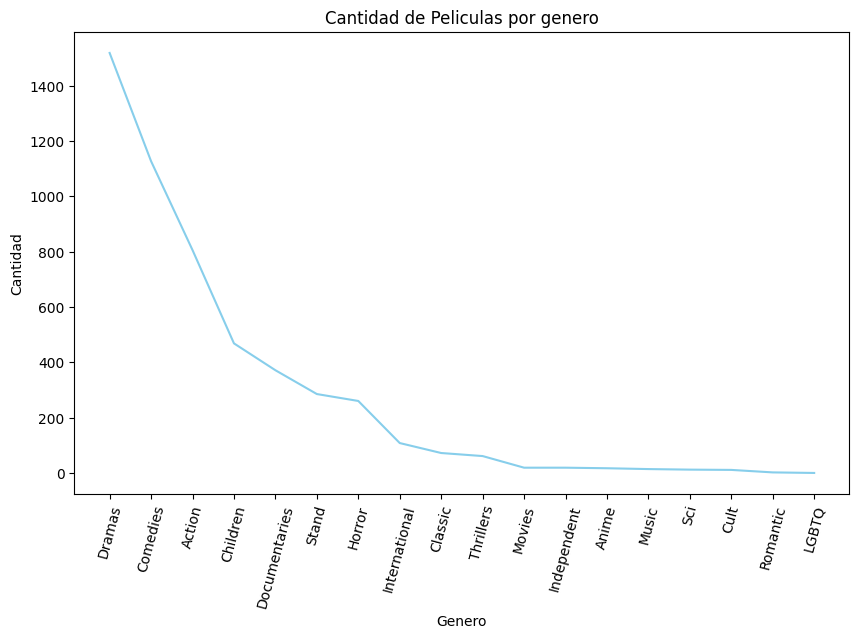

In [63]:
# Extraiga géneros de la columna 'listed_in'
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Contar las apariciones de cada género
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Cambie el nombre de las columnas a 'género' y 'recuento'
genre_counts_movie.columns = ['genre', 'count']

# Crear un diagrama de barras de recuentos de géneros
plt.figure(figsize=(10, 6))
plt.plot(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.title('Cantidad de Peliculas por genero')
plt.xticks(rotation=75)
plt.show()